## Binary search trees (BSTs) and AVL trees

Jacob L. Fine

June 23rd, 2024

A binary search tree (BST) is a data structure that can store a list of integers as a rooted binary tree, where each node on the BST has anywhere from zero to two children nodes. The fundamental property of the BST is that for each value stored at each node, the value is greater than every value on the left substree and less than every value on the right subtree. No two nodes can have the same value.

BSTs can be useful for searching for a given value in a list of values, by making a series of binary decisions at each node, i.e., whether our query value is greater than, less than, or equal to the value present at a given node. The search space is therefore conveniently halved at each step. Based on the outcome of this decision, we move down in the tree until we reach our value, unless it is not present in the tree. 

A BST can thus used to perform a binary search, which has a average-case time complexity of O(log n) and a worst-case time complexity of O(n). One of the downsides of a BST is that our tree may become 'unbalanced' where one subtree a depth much greater than any other subtree in the graph. Under such conditions, it may be desirable to 'balance' the tree based on the relative depths of the subtrees present at a given node each step in the algorithm. This is the basis of self-balancing binary search trees, which include AVL trees and red-black trees, for instance.

To solve the balancing problem, Adelson-Velsky and Landis proposed a self-balancing binary search tree, named after them: the AVL tree. Before conducting a search on a BST, we must balance the tree using the method of Adelson-Velsky and Landis to construct an AVL tree. The balancing procedure involves ensuring that the height difference between the left and right subtrees of any node is no greater than one. We iteratively rearrange the tree until this criterion is met, guaranteeing a balanced structure where leaf nodes have similar depths. This balance significantly improves operations such as searches, insertions, and deletions, and attains a worst-case time complexity of O(log n); an improvement over the BST's O(n). The method used for searching is the same as in a BST, with the crucial difference being whether the BST was balanced before the search.

We will construct BSTsand AVL trees below, and use perform search operations on lists of numbers for varying input sizes, and measure runtimes. It will be shown 

In [70]:
# Binary Search Tree (BST)

import time
import random
import matplotlib.pyplot as plt


# creating the node object, we give it the properties of having left and right children (only 2 children total, since its binary). We give it a value, which we will be calling 'key'
class TreeNodeBST:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.value = key

# we are going to place every element in a random list of numbers onto a BST
# we will iterate through each key and compare its magnitude to each node and place it on the left or right (or further down) depending on the comparisons
class BST:
    # we first initialize the node  node
    def __init__(self):
        self.node = None

    def insert(self, key):  
        # first, if the node is empty, we add the key from the random list of numbers to it.
        if self.node is None:
            self.node = TreeNodeBST(key)
        # otherwise, we call the helper function
        else:
            self._insert(self.node, key)

    def _insert(self, node, key):
        # we compare the value of the new to-be-added key to the current value present in the node.
        # consistent with the definition of a BST, if this new value is less than the current value, we want it on the left subtree of the current node, so do the following...
        if key < node.value:
            # we place the new value on the left child of the current node if the left child is empty
            if node.left is None:
                node.left = TreeNodeBST(key)
            # if the left child is not empty, we will call the function again (recursion) until we reach an empty node or leaf node
            else:
                self._insert(node.left, key)
        else:
            # if the new to-be-added key is not less than the current value, we want it on the right subtree, so do the following...
            # if the right child node is empty, fill it with that value
            if node.right is None:
                node.right = TreeNodeBST(key)
            # otherwise, call the function again until we reach an empty node or leaf node
            else:
                self._insert(node.right, key)

    def search(self, key):
        return self._search(self.node, key)

    def _search(self, node, key):
        # we will keep looking through the tree by making binary decisions at each node
        # if the node is empty (i.e., our key wasn't in the tree) or the node has our key, we return the node
        if node is None or node.value == key:
            return node
        # this is our binary decision: if the key we are searching for is less than the current value at the node, because of the BST property, it must be on the left subtree
        if key < node.value:
            return self._search(node.left, key)
        # otherwise, it must be on the right subtree
        return self._search(node.right, key)




In [71]:
# AVL trees

class TreeNodeAVL:
    # we initialize a node as having properties left child, right child, value, and a height. Each node starts with height of 1, and when we create our tree, we will use recrusion to define heights of each node
    def __init__(self, key):
        self.left = None
        self.right = None
        self.value = key
        self.height = 1


# the AVL tree class
class AVLTree:
    # similar to BST, we define the method to insert new keys into the tree
    def insert(self, node, key):
        # first, if the node is empty, we fill it with the key, otherwise...
        # before considering children nodes, we always ask first if our node is empty.
        if not node:
            return TreeNodeAVL(key)
        # as with the BST, if the new key to add to the tree is less than the current node value, we want it on the left subtree so our current node is greater than it to satisfy the BST property.
        elif key < node.value:
            node.left = self.insert(node.left, key)
            # otherwise, we put it on the right subtree
        else:
            node.right = self.insert(node.right, key)
        
        # we now update the height of our node based on which of its children has a greater height, so its 1 + (the child node with a greater height)

        node.height = 1 + max(self.determine_height(node.left), self.determine_height(node.right))

        # we define the balance factor of the node using the getBalance function, which is simply the differnece in heights of the children nodes
        balance = self.getBalance(node)

        # the four possible ways to rearrange the node structure based on the balance factor and the magnitude of the value in the current node (2 x 2 = 4)
        if balance > 1 and key < node.left.value:
            return self.rotate_right(node)
        if balance < -1 and key > node.right.value:
            return self.rotate_left(node)
        if balance > 1 and key > node.left.value:
            node.left = self.rotate_left(node.left)
            return self.rotate_right(node)
        if balance < -1 and key < node.right.value:
            node.right = self.rotate_right(node.right)
            return self.rotate_left(node)
        # we return the node, if we don't need to rotate it
        return node

    # there are two types of rotations: left and right
    def rotate_right(self, z):
        # select the left child of the current node (z)
        y = z.left
        # select the right child of the left child of the current node (U)
        U = y.right
        # then set the right child of the left child (y) of the current node to the current node (z)
        y.right = z
        # set the left child of the current node (z) to U (the original right child of y)
        z.left = U
        # next, update the heights of the nodes z and y accordingly, based on their children
        z.height = 1 + max(self.determine_height(z.left), self.determine_height(z.right))
        y.height = 1 + max(self.determine_height(y.left), self.determine_height(y.right))
        # we return y, which is the new node of the subtree after the rotation (it was initially the left child of the current node z)
        return y


    def rotate_left(self, z):
        # select the right child of the current node (z)
        y = z.right
        # we select the left child of the right child of the current node (V)
        V = y.left
        # set the left child of the right child (y) of the current node to the current node
        y.left = z
        # set the right node of the current node to V, the original left child of y
        z.right = V
        # next, update the heights of the nodes z and y accordingly, based on their children
        z.height = 1 + max(self.determine_height(z.left), self.determine_height(z.right))
        y.height = 1 + max(self.determine_height(y.left), self.determine_height(y.right))
        return y
    # gets the height of a given node
    def determine_height(self, node):
        if not node:
            return 0
        return node.height

    # the way to get the balance; simply the difference in heights of the children nodes
    def getBalance(self, node):
        if not node:
            return 0
        return self.determine_height(node.left) - self.determine_height(node.right)

    # the standard binary search method, same as for our non-AVL BST
    def search(self, node, key):
        if not node or node.value == key:
            return node
        if key < node.value:
            return self.search(node.left, key)
        return self.search(node.right, key)




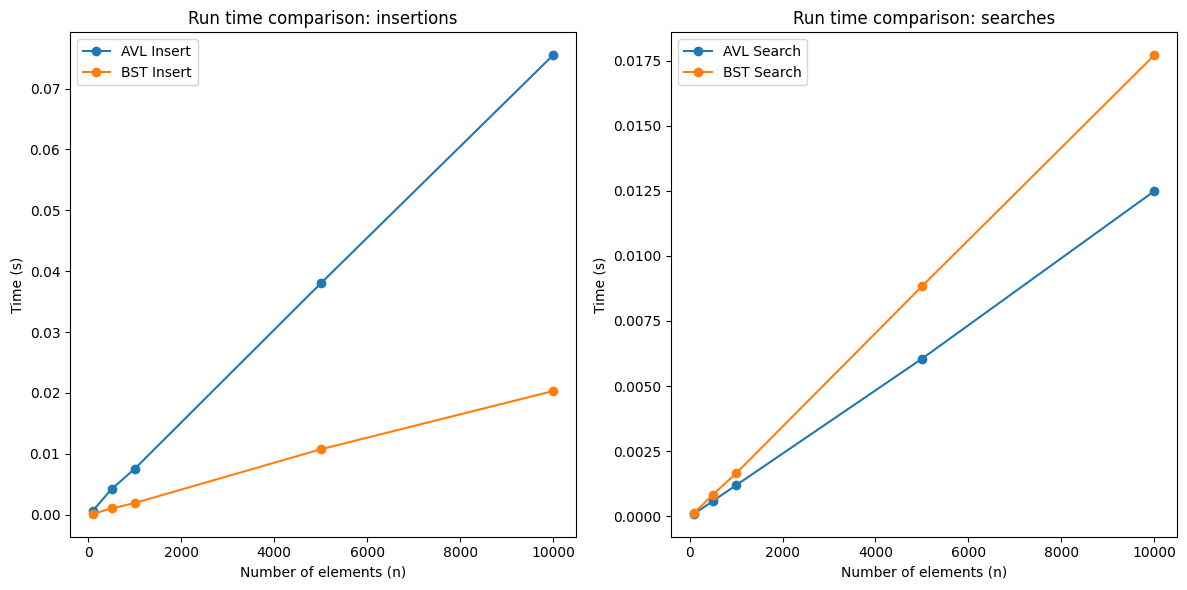

In [74]:
# for measuring runtimes
def measure_runtime(tree_type, elements_to_add):
    # the function will be called for BST and AVL, so we compute run times accordingly
    if tree_type == 'AVL':
        tree = AVLTree()
        node  = None
        # we use the time library to record the start time and insert time
        start_time = time.time()
        for element in elements_to_add:
            node  = tree.insert(node, element)
        insert_time = time.time() - start_time # the time to make all the insertions for each node in the element_list. Same procedures as below

        start_time = time.time()
        for element in elements_to_add:
            tree.search(node , element)
        search_time = time.time() - start_time

    elif tree_type == 'BST':
        tree = BST()
        start_time = time.time()
        for element in elements_to_add:
            tree.insert(element)
        insert_time = time.time() - start_time

        start_time = time.time()
        for element in elements_to_add:
            tree.search(element)
        search_time = time.time() - start_time

    return insert_time, search_time

sizes = [100, 500, 1000, 5000, 10000]

# stores the values of insertion times for different sizes, for the BSL and AVL trees
result_times = {'AVL': {'insert': [], 'search': []}, 'BST': {'insert': [], 'search': []}}

for size in sizes:
    # generates the list of elements to add based on the size
    elements_to_add = random.sample(range(1, size * 10), size)
    # calls the functions to measure runtime
    insert_time_AVL, search_time_AVL = measure_runtime('AVL', elements_to_add)
    insert_time_BST, search_time_BST = measure_runtime('BST', elements_to_add)

    # updates the values accordingly for each tree and method being tested

    result_times['AVL']['insert'].append(insert_time_AVL)
    result_times['AVL']['search'].append(search_time_AVL)
    result_times['BST']['insert'].append(insert_time_BST)
    result_times['BST']['search'].append(search_time_BST)

# Plotting the result_times
plt.figure(figsize=(12, 6))

# plots insertion times
plt.subplot(1, 2, 1)
plt.plot(sizes, result_times['AVL']['insert'], marker='o', label='AVL Insert')
plt.plot(sizes, result_times['BST']['insert'], marker='o', label='BST Insert')
plt.xlabel('Number of elements (n)')
plt.ylabel('Time (s)')
plt.title('Run time comparison: insertions')
plt.legend()

# plots search times
plt.subplot(1, 2, 2)
plt.plot(sizes, result_times['AVL']['search'], marker='o', label='AVL Search')
plt.plot(sizes, result_times['BST']['search'], marker='o', label='BST Search')
plt.xlabel('Number of elements (n)')
plt.ylabel('Time (s)')
plt.title('Run time comparison: searches')
plt.legend()

plt.tight_layout()
plt.show()

As is shown, while it may take longer to construct the AVL tree, due to the balancing component of the algorithm to insert values, we can see that it consistently outperforms the BST for searching for elements.